# ISA 514 Project Model: Neural Network
Intro code to look at data

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving movies_topic_modeling.csv to movies_topic_modeling.csv


In [ ]:
#import pandas as pd
#import io

#df = pd.read_csv(io.BytesIO(uploaded['movies_topic_modeling.csv']))
#df.head()

,Title,Year,Movie_Hits,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,budget,revenue,...,overview,overview_positive,overview_negative,overview_neutral,overview_compound,overview_processes,Personal Growth Drama,Group Conflict,Mission-Driven Thriller,Small-Town Heroism
0,#Alive,2020,63.0,62,1,0,0,0,6300000.0,13416285.0,...,"As a grisly virus rampages a city, a lone man ...",0.092,0.223,0.685,-0.4215,as a grisly virus rampages a city a lone man s...,0.015336,0.015286,0.954119,0.015259
1,(500) Days of Summer,2009,21.0,83,0,1,0,0,7500000.0,60781545.0,...,"Tom, greeting-card writer and hopeless romanti...",0.220,0.097,0.683,0.8020,tom greeting-card writer and hopeless romantic...,0.971025,0.000000,0.000000,0.000000
2,...And God Created Woman,1956,0.0,60,0,0,1,0,300000.0,33000000.0,...,"Juliette Hardy is sexual dynamite, and has the...",0.177,0.051,0.772,0.6416,juliette hardy is sexual dynamite and has the ...,0.013028,0.960963,0.012833,0.013176
3,10 Items or Less,2006,9.0,63,0,0,1,0,400.0,1.0,...,An actor who is considering the role of a supe...,0.147,0.000,0.853,0.8807,an actor who is considering the role of a supe...,0.317286,0.000000,0.669041,0.000000
4,102 Dalmatians,2000,12.0,60,0,0,0,1,85000000.0,183611771.0,...,Get ready for a howling good time as an all ne...,0.254,0.040,0.706,0.9438,get ready for a howling good time as an all ne...,0.000000,0.980500,0.000000,0.000000


In [ ]:
#df.columns.tolist()

['Title',
 'Year',
 'Movie_Hits',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'budget',
 'revenue',
 'runtime',
 'tagline',
 'Revenue-Budget Ratio',
 'Revenue-Runtime Ratio',
 'tagline_compound',
 'tagline_neutral',
 'tagline_negative',
 'tagline_positive',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'Rating',
 'overview',
 'overview_positive',
 'overview_negative',
 'overview_neutral',
 'overview_compound',
 'overview_processes',
 'Personal Growth Drama',
 'Group Conflict',
 'Mission-Driven Thriller',
 'Small-Town Heroism']

### Code to begin Modeling the Neural Networks

In [ ]:
# Preprocessing loading in packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import io

# upload data (need to download data then upload here)
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Data loaded:", df.shape)

# setting up target variables
targets = {
    "Netflix": df["Netflix"],
    "Hulu": df["Hulu"],
    "Prime": df["Prime Video"],
    "Disney": df["Disney+"]
}

# drop target columns for features & columns not using
X = df.drop(columns=["Netflix", "Hulu", "Prime Video", "Disney+", "Title", "overview", "tagline", "overview_processes"])  # removing targets and categorical variables we can't make into dummy

# seperate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# deal w/ missing values
imputer_num = SimpleImputer(strategy="mean")
X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])

imputer_cat = SimpleImputer(strategy="most_frequent")
if categorical_cols:
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

all_feature_names = X.columns.tolist()

# scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing done. X shape:", X_scaled.shape)

Saving movies_topic_modeling.csv to movies_topic_modeling (1).csv
Data loaded: (1569, 48)
Preprocessing done. X shape: (1569, 43)


# Neural Networks

Running logisitc regression (with Lasso) first for variable selection, then created a loop to generate Neural Networks for each streaming platform.

In [ ]:
# Variable selection with lasso logisitc regression

def lasso_features(X, y, C=0.1, max_iter=1000):
    model = LogisticRegression(
        penalty="l1", solver="liblinear", C=C, max_iter=max_iter, random_state=42 ## l1 for lasso reg
    )
    model.fit(X, y)
    coefs = model.coef_[0] # getting coeficients
    selected = [all_feature_names[i] for i in range(len(coefs)) if coefs[i] != 0]  ## returning for vars w/ coefficients > 0
    return selected

## finding out the selected features from each regression
netflix_features = lasso_features(X_scaled, targets["Netflix"])
hulu_features = lasso_features(X_scaled, targets["Hulu"])
prime_features = lasso_features(X_scaled, targets["Prime"])
disney_features = lasso_features(X_scaled, targets["Disney"])

print("Netflix selected features:", netflix_features)
print("Hulu selected features:", hulu_features)
print("Prime selected features:", prime_features)
print("Disney selected features:", disney_features)

Netflix selected features: ['Year', 'Rotten Tomatoes', 'budget', 'revenue', 'runtime', 'Revenue-Budget Ratio', 'Action', 'Adventure', 'Animation', 'Crime', 'Documentary', 'Family', 'Horror', 'Music', 'Mystery', 'Romance', 'Western', 'overview_compound', 'Personal Growth Drama', 'Group Conflict', 'Rating_PG-13', 'Rating_Unknown']
Hulu selected features: ['Year', 'Movie_Hits', 'Rotten Tomatoes', 'revenue', 'runtime', 'Revenue-Budget Ratio', 'Action', 'Animation', 'Crime', 'Family', 'Horror', 'Music', 'Science Fiction', 'TV Movie', 'Thriller', 'Western', 'overview_neutral', 'Group Conflict', 'Rating_PG-13', 'Rating_R', 'Rating_Unknown']
Prime selected features: ['Year', 'Rotten Tomatoes', 'runtime', 'Revenue-Runtime Ratio', 'tagline_compound', 'Animation', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Romance', 'Science Fiction', 'Western', 'overview_compound', 'Rating_PG-13', 'Rating_R']
Disney selected features: ['Year', 'Rotten Tomatoes', 'budget', 'revenu

Running the Neural Networks using the varaibles selected above

In [ ]:
# NEURAL NETWORKS for Netflix, Hulu, Prime Video, and Disney +

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_and_evaluate_nn(X_scaled, features, y, platform_name): ## setting up function
    idx = [all_feature_names.index(f) for f in features]  # only selected columns from lasso regression above
    X_sel = X_scaled[:, idx]

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_sel, y, test_size=0.30, random_state=99, stratify=y
    )

    # building model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'), ## non-linear activation function
        Dense(1, activation='sigmoid')  ## squashes any real-valued input into a range between 0 and 1
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # train model
    model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)

    # predicted probabilities
    y_pred_prob = model.predict(X_test).flatten()
    # binary predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    # model metrics
    print(f"\n{platform_name.upper()} PERFORMANCE")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # return true labels and predicted probabilities for later use
    return y_test, y_pred_prob

# running neural networks and storing results
netflix_results = build_and_evaluate_nn(X_scaled, netflix_features, targets["Netflix"], "Netflix")
hulu_results = build_and_evaluate_nn(X_scaled, hulu_features, targets["Hulu"], "Hulu")
prime_results = build_and_evaluate_nn(X_scaled, prime_features, targets["Prime"], "Prime")
disney_results = build_and_evaluate_nn(X_scaled, disney_features, targets["Disney"], "Disney")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

NETFLIX PERFORMANCE
Accuracy: 0.6581740976645435

Confusion Matrix:
 [[267  58]
 [103  43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       325
           1       0.43      0.29      0.35       146

    accuracy                           0.66       471
   macro avg       0.57      0.56      0.56       471
weighted avg       0.63      0.66      0.64       471



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

HULU PERFORMANCE
Accuracy: 0.7770700636942676

Confusion Matrix:
 [[352  13]
 [ 92  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       365
           1       0.52      0.13      0.21       106

    accuracy                           0.78       471
   macro avg       0.66      0.55      0.54       471
weighted avg       0.73      0.78      0.72       471



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

PRIME PERFORMANCE
Accuracy: 0.6900212314225053

Confusion Matrix:
 [[234  71]
 [ 75  91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       305
           1       0.56      0.55      0.55       166

    accuracy                           0.69       471
   macro avg       0.66      0.66      0.66       471
weighted avg       0.69      0.69      0.69       471



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

DISNEY PERFORMANCE
Accuracy: 0.89171974522293

Confusion Matrix:
 [[368  22]
 [ 29  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       390
           1       0.70      0.64      0.67        81

    accuracy                           0.89       471
   macro avg       0.81      0.79      0.80       471
weighted avg       0.89      0.89      0.89       471



Plotting the models AUC on the ROC curve

Netflix AUC: 0.640
Hulu AUC: 0.665
Prime AUC: 0.711
Disney AUC: 0.941


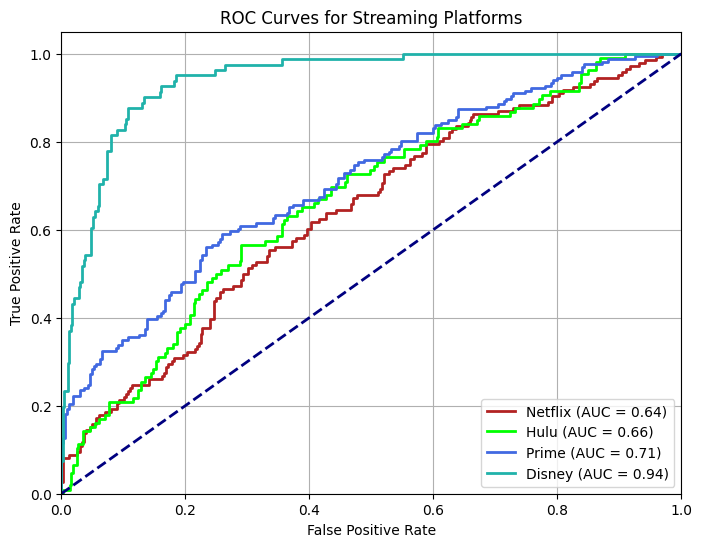

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Store results in a dictionary
platform_results = {
    "Netflix": netflix_results,
    "Hulu": hulu_results,
    "Prime": prime_results,
    "Disney": disney_results
}

# Define platform colors
platform_colors = {
    "Netflix": "firebrick",
    "Prime": "royalblue",
    "Disney": "lightseagreen",
    "Hulu": "lime"
}

plt.figure(figsize=(8, 6))

## getting the true pos rate and false pos rate to plot the curve
for name, (y_true, y_prob) in platform_results.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"{name} AUC: {roc_auc:.3f}")
    plt.plot(
        fpr, tpr,
        lw=2,
        color=platform_colors[name],
        label=f'{name} (AUC = {roc_auc:.2f})'
    )

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## plot visual adjustments
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Streaming Platforms')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Performance Metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    roc_auc_score, confusion_matrix
)
import pandas as pd

## function to pull the metrics for each neural network model
def compute_metrics(y_true, y_prob):
    y_pred = (y_prob > 0.4).astype(int)

    accuracy = accuracy_score(y_true, y_pred)  ## accuracy

    report = classification_report(y_true, y_pred, output_dict=True)  ## classification report

    precision_w = report['weighted avg']['precision'] ## sensitivity (weighted)
    recall_w = report['weighted avg']['recall']
    f1_w = report['weighted avg']['f1-score']

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()  ## creating the matrix
    specificity = tn / (tn + fp)

    auc = roc_auc_score(y_true, y_prob)  ## auc

    return accuracy, precision_w, recall_w, f1_w, specificity, auc

platform_results = {"Netflix": netflix_results,"Hulu": hulu_results,"Prime": prime_results,"Disney": disney_results}

metrics_data = []

print(" NEURAL NETWORK PERFORMANCE METRICS")

for name, (y_true, y_prob) in platform_results.items():
    accuracy, precision_w, recall_w, f1_w, specificity, auc = compute_metrics(y_true, y_prob)  ## loop to print each platform's metrics

    metrics_data.append([
        name,
        accuracy,
        precision_w,
        recall_w,       # weighted sensitivity
        f1_w,
        specificity,
        auc ])

metrics_df = pd.DataFrame(
    metrics_data,
    columns=["Platform", "Accuracy", "Precision",
             "Sensitivity", "F1",
             "Specificity", "AUC"])
metrics_df

 NEURAL NETWORK PERFORMANCE METRICS


,Platform,Accuracy,Precision,Sensitivity,F1,Specificity,AUC
0,Netflix,0.643312,0.637954,0.643312,0.640457,0.753846,0.639789
1,Hulu,0.730361,0.695153,0.730361,0.708360,0.876712,0.664616
2,Prime,0.628450,0.665519,0.628450,0.636644,0.613115,0.710527
3,Disney,0.893843,0.894910,0.893843,0.894354,0.933333,0.940677


Feature Importance

In [ ]:
# --- LASSO FEATURE IMPORTANCE EXTRACTION ---

def lasso_feature_importance(X, y, C=0.1, max_iter=1000):
    model = LogisticRegression(
        penalty="l1", solver="liblinear", C=C,
        max_iter=max_iter, random_state=42
    )
    model.fit(X, y)

    coefs = model.coef_[0]

    # Build dataframe for sorting
    coef_df = pd.DataFrame({
        "feature": all_feature_names,
        "coef": coefs,
        "abs_coef": np.abs(coefs)
    })

    # Keep only non-zero coefficients
    coef_df = coef_df[coef_df["coef"] != 0]

    # Sort by absolute coefficient strength (importance)
    coef_df = coef_df.sort_values(by="abs_coef", ascending=False)

    return coef_df


# --- Compute top 15 features per platform ---
platform_importances = {}

platform_targets = {
    "Netflix": targets["Netflix"],
    "Hulu": targets["Hulu"],
    "Prime Video": targets["Prime"],
    "Disney+": targets["Disney"]
}

print("\n==============================")
print(" TOP 15 FEATURE IMPORTANCES PER PLATFORM (LASSO)")
print("==============================\n")

for platform, y in platform_targets.items():
    coef_df = lasso_feature_importance(X_scaled, y)
    top15 = coef_df.head(15)
    platform_importances[platform] = top15

    print(f"\n🔹 {platform} — Top 15 Features")
    print(top15[["feature", "coef"]].to_string(index=False))
    print("----------------------------------")



 TOP 15 FEATURE IMPORTANCES PER PLATFORM (LASSO)


🔹 Netflix — Top 15 Features
        feature      coef
           Year  0.637776
        runtime  0.281761
         budget -0.166302
 Rating_Unknown  0.113772
          Crime  0.105949
   Rating_PG-13  0.095309
        Romance  0.093840
      Adventure -0.091125
      Animation  0.090140
          Music -0.069389
        revenue -0.060426
        Western  0.051548
         Family -0.034445
         Horror -0.021516
Rotten Tomatoes  0.020151
----------------------------------

🔹 Hulu — Top 15 Features
             feature      coef
     Rotten Tomatoes  0.316389
              Family -0.234178
             runtime -0.168062
            Rating_R  0.157970
             revenue -0.149108
        Rating_PG-13  0.123590
                Year  0.120419
               Music  0.101365
              Horror  0.100854
          Movie_Hits  0.072685
      Group Conflict -0.071885
           Animation -0.053652
Revenue-Budget Ratio  0.047559
         

Bar Charts for Top Features for Platforms

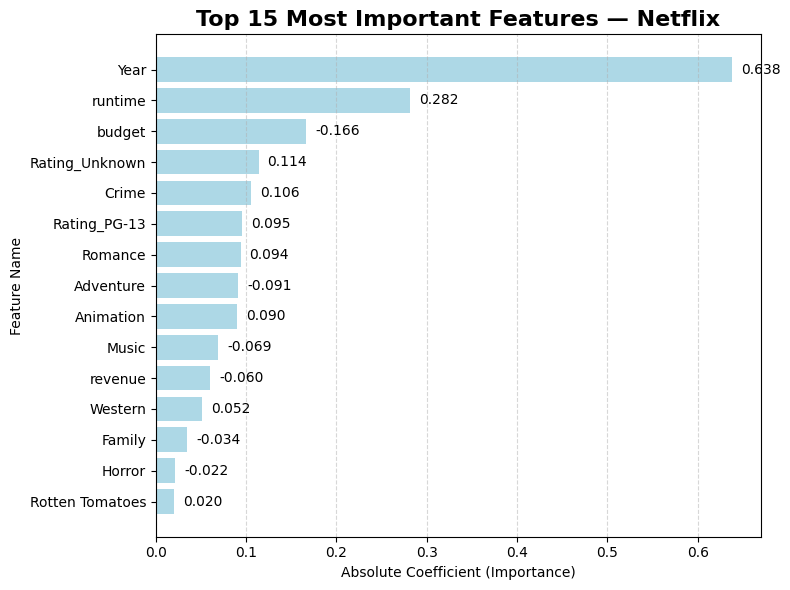

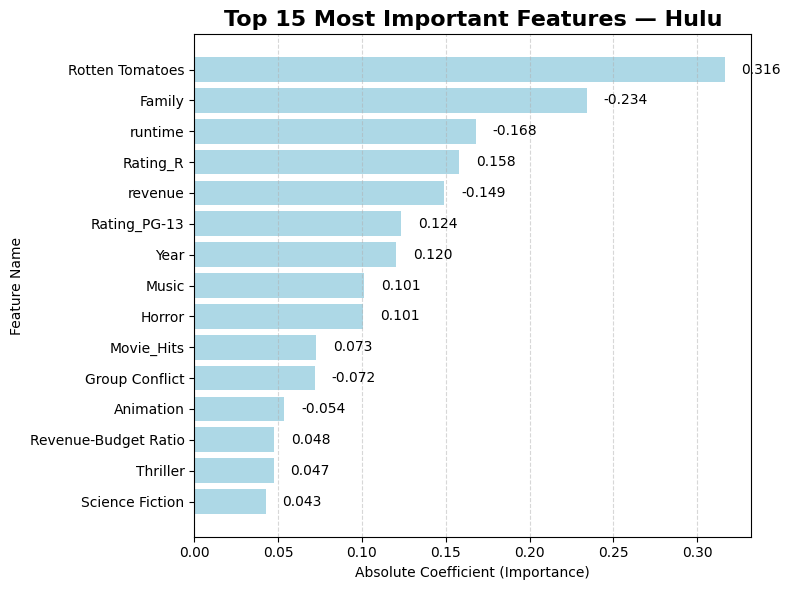

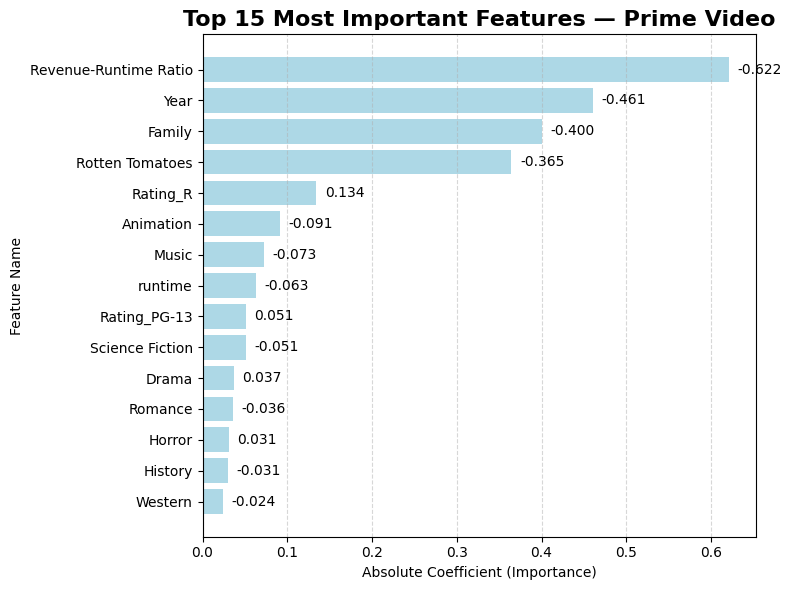

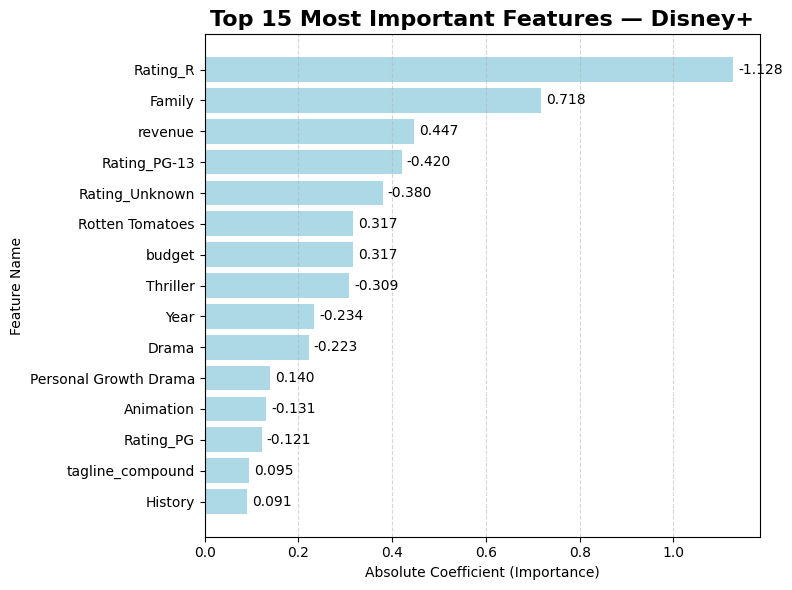

In [ ]:
import matplotlib.pyplot as plt

# --- BAR CHARTS FOR TOP 15 FEATURES PER PLATFORM ---

for platform, coef_df in platform_importances.items():

    top15 = coef_df.head(15)

    # Sort for better visual (largest at top)
    top15 = top15.sort_values(by="abs_coef", ascending=True)

    plt.figure(figsize=(8, 6))

    plt.barh(top15["feature"], top15["abs_coef"], color="lightblue")

    plt.title(f"Top 15 Most Important Features — {platform}", fontsize=16, weight='bold')
    plt.xlabel("Absolute Coefficient (Importance)")
    plt.ylabel("Feature Name")
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Annotate with actual coefficient values
    for i, (coef, abscoef) in enumerate(zip(top15["coef"], top15["abs_coef"])):
        plt.text(abscoef + 0.01, i, f"{coef:.3f}", va='center')

    plt.tight_layout()
    plt.show()